In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Для начала посмотим, что у нас за данные:

In [2]:
train_df = pd.read_csv('train.csv')

/Users/andrewlarin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [118]:
test_df = pd.read_csv('test.csv')

In [124]:
store_df = pd.read_csv('store.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [119]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [126]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [125]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Видно, что данные довольно чистые, не считая того, что в тестовой выборке отсутствуют значения Open, а также несколько полея в дополнительных данных по магазинам, заменим их нулями:

In [123]:
test_df.fillna(0, inplace=True)

In [127]:
store_df.fillna(0, inplace=True)

#### Соединим таблицы и опишем данные:

In [129]:
train_store_df = train_df.merge(store_df)

In [132]:
test_store_df = test_df.merge(store_df)

In [133]:
train_store_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [134]:
train_store_df.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


#### Опишем признаки:

<ul>
<li><b>Store</b> - Уникальный идентификатор магазина;</li>
<li><b>DayOfWeek</b> - День недели (1-пн, 2-вт, 3-ср, 4-чт, 5-пт, 6-сб, 7-вс);</li>
<li><b>Date</b> - Дата;</li>
<li><b>Sales</b> - Продажи за день (целевая переменная);</li>
<li><b>Customers</b> - Количество посетителей за день;</li>
<li><b>Open</b> - Открыт/закрыто: 0 = закрыто, 1 = открыто;</li>
<li><b>Promo</b> - Означает, что магазин запустил промо акции в этот день;</li>
<li><b>StateHoliday</b> - Государственный праздник. Обычно все магазины, кроме некоторых закрыты в этот день. А также все школы закрыты тоже. a = государственный праздник, b = Пасха, c = Рождество, 0 = None;</li>
<li><b>SchoolHoliday</b> - Как я понял, означает прямое влияние школьных выходных на закрытие магазина.</li>
</ul>

#### Количество уникальных магазинов в выборке:

In [6]:
train_df.Store.unique().shape

(1115,)

#### Посмотрим распределение магазинов по временному ряду:

In [7]:
train_df.groupby(['Store'])['DayOfWeek'].agg(['count']).reset_index().groupby(['count']).agg(['count'])

,Store
,count
count,
758,180
941,1
942,934


Видно, что для большинства магазинов в выборке, временной ряд составляет 942 дня, для 180 - 758 дней и для одного магазина - 1. Большого разброса не наблюдается, что хорошо.

#### Визуализируем данные (так как магазинов очень много, то сгруппируем их среднюю продаж по дням):

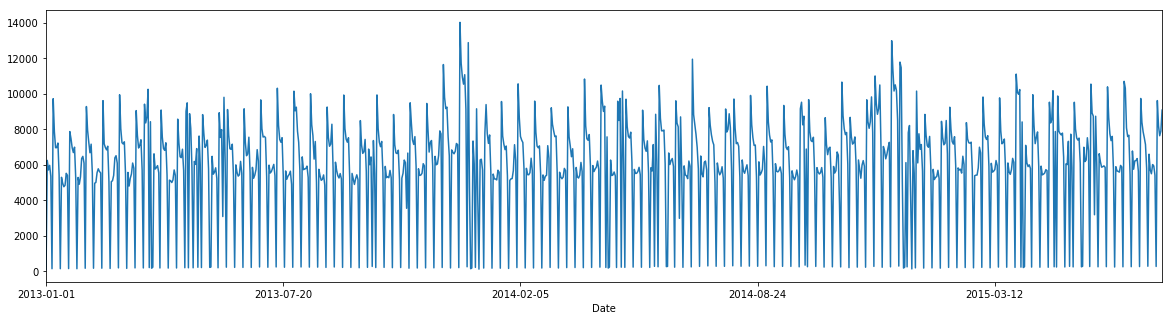

In [23]:
train_df.groupby(['Date'])['Sales'].mean().plot(figsize=(20, 5))

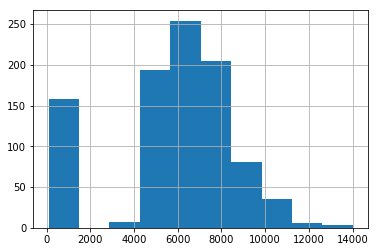

In [28]:
train_df.groupby(['Date'])['Sales'].mean().hist()

In [29]:
train_df.groupby(['Date'])['Sales'].mean().describe()

count      942.000000
mean      5782.702036
std       2888.462029
min         87.284560
25%       5321.408512
50%       6036.153617
75%       7530.909865
max      14012.150673
Name: Sales, dtype: float64

График, конечно, получился не очень говорящий, но видно, что продажи не стабильны, в какие-то дни близки к 0.0, а в другие очень высокие. Распределение по продажам тоже далеко от нормального, в выборке представленно большое количество дней, в которых во всех магазинах были низкие продажи. 

#### Попробуем сделать тоже самое, для 2-х случайных магазинов из выбоки:

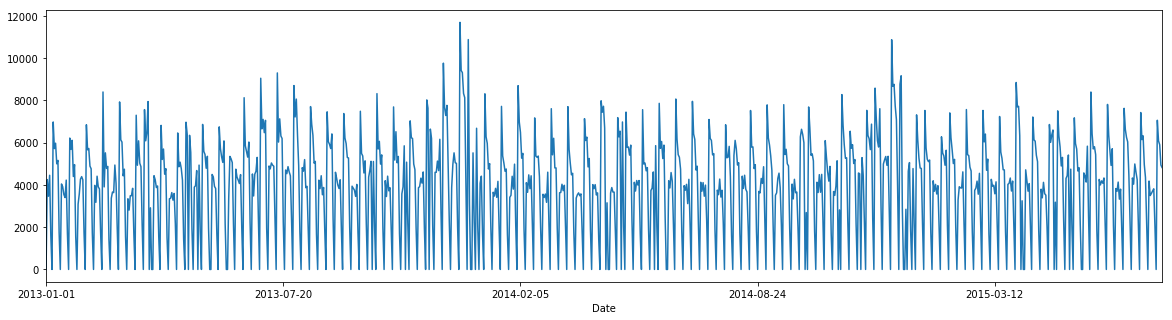

In [26]:
train_df[train_df['Store'] == 5].groupby(['Date'])['Sales'].sum().plot(figsize=(20, 5))

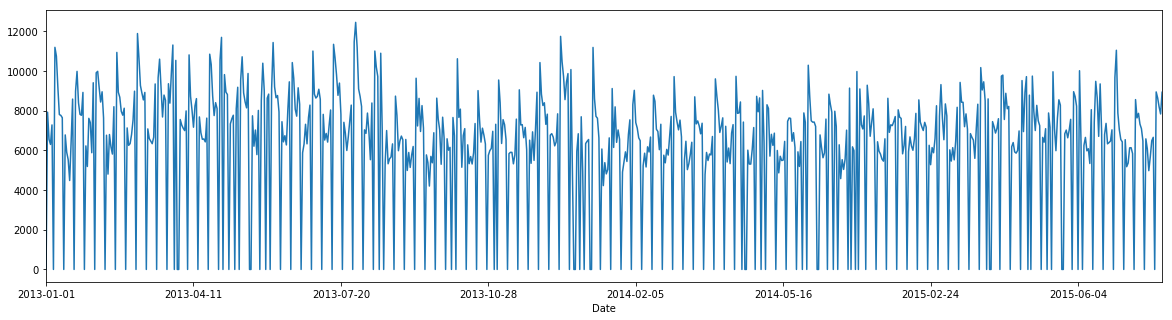

In [45]:
train_df[train_df['Store'] == 1000].groupby(['Date'])['Sales'].sum().plot(figsize=(20, 5))

Видно, что динамика для конкретного магазина, в целом похожа на общую динамику, а также заметны просадки до 0 с регулярной частотой. Для праздников они случаются слишком часто, скорее всего это связано с выходными, проверим эту версию:

In [117]:
days = {
    1: 'в понедельник',
    2: 'во вторник',
    3: 'в среду',
    4: 'в четверг',
    5: 'в пятницу',
    6: 'в субботу',
    7: 'в воскресение',
}

for k, v in days.items():
    print('Среднее количество продаж {}: {}'.format(
        v,
        train_df[train_df['DayOfWeek'] == k].groupby(['DayOfWeek'])['Sales'].mean().values[0]
    ))

Среднее количество продаж в понедельник: 7809.04451047
Среднее количество продаж во вторник: 7005.24446672
Среднее количество продаж в среду: 6555.88413826
Среднее количество продаж в четверг: 6247.57591278
Среднее количество продаж в пятницу: 6723.27430491
Среднее количество продаж в субботу: 5847.56259932
Среднее количество продаж в воскресение: 204.183189387


Как видно, в воскресение, дейтвительно крайне мало продаж, а самые популярные дни - понедельник и пятница.

### Проведем тест на стационарность: